# Лабораторная работа 02 (шкалы измерения)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Задание 1: Определение типа шкалы измерения
Создайте список, состоящий из различных типов данных (например, возраст, пол, уровень образования, зарплата и т.д.). Затем создайте функцию на Python, которая будет проходить через каждый элемент этого списка и определять тип шкалы измерения (номинальная, порядковая, интервальная, отношения).

In [2]:
titanic_data = pd.read_csv('data/train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [17]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
def define_measurement_type(data : pd.DataFrame):
    measurements_types = {}
    for name, data in data.items():
        if data.dtype == object:
            measurements_types[name] = 'Номинальная шкала измерения'
        elif data.dtype == np.int64 or data.dtype == np.float64:
            if sorted(data.unique()) == list(range(1, len(data.unique()) + 1)):
                measurements_types[name] = 'Порядковая шкала измерения'
            elif data.min() >= 0:
                measurements_types[name] = 'Отношений шкала измерения'
            else:
                measurements_types[name] = 'Интервальная шкала измерения'
    return measurements_types

In [44]:
define_measurement_type(titanic_data)

{'PassengerId': 'Порядковая шкала измерения',
 'Survived': 'Отношений шкала измерения',
 'Pclass': 'Порядковая шкала измерения',
 'Name': 'Номинальная шкала измерения',
 'Sex': 'Номинальная шкала измерения',
 'Age': 'Отношений шкала измерения',
 'SibSp': 'Отношений шкала измерения',
 'Parch': 'Отношений шкала измерения',
 'Ticket': 'Номинальная шкала измерения',
 'Fare': 'Отношений шкала измерения',
 'Cabin': 'Номинальная шкала измерения',
 'Embarked': 'Номинальная шкала измерения',
 'Adult': 'Отношений шкала измерения'}

# Задание 2: Приведение данных к нужной шкале
Создайте датафрейм с данными, которые необходимо привести к номинальной или порядковой шкале. Создайте функцию на Python, которая преобразует эти данные в нужные шкалы.

Рассмотрим столбец Age. Разделим пассажиров по возрасту на несовершеннолетних и совершеннолетних -- это и будет наша номинальная шкала.

In [19]:
def age_transfrom(data):
    if data < 18:
        return 0
    else:
        return 1

In [20]:
titanic_data['Adult'] = titanic_data['Age'].apply(age_transfrom)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


## Задание 3: Анализ данных с использованием различных шкал измерения
Создайте датафрейм с данными различных типов (к примеру, пол, возраст, уровень образования, баллы за тест). Проанализируйте эти данные с использованием функций Python, которые соответствуют типу шкалы каждого элемента данных (например, мода для номинальной шкалы, медиана для порядковой шкалы, среднее значение для интервальной и отношения).


Рассмотрим следующие случайные величины:
- Embarked : номинальная;
- Age : отношений;
- Pclass : порядковая.

Для них рассчитаем соответствующие характеристики

In [48]:
titanic_data.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [7]:
titanic_data.Pclass.median()

3.0

In [6]:
titanic_data.Age.mean()

29.69911764705882

## Задание 4: Визуализация данных в зависимости от шкалы измерения
Ваша задача создать визуализации для различных типов шкал. Возьмите набор данных и создайте различные виды диаграмм (например, столбчатые диаграммы для номинальной шкалы, гистограммы для порядковой, интервальной и шкалы отношений).


In [8]:
hapiness_data = pd.read_csv('data/2019.csv')

In [9]:
hapiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Сперва определим типы шкал для новых данных

In [53]:
define_measurement_type(hapiness_data)

{'Overall rank': 'Порядковая шкала измерения',
 'Country or region': 'Номинальная шкала измерения',
 'Score': 'Отношений шкала измерения',
 'GDP per capita': 'Отношений шкала измерения',
 'Social support': 'Отношений шкала измерения',
 'Healthy life expectancy': 'Отношений шкала измерения',
 'Freedom to make life choices': 'Отношений шкала измерения',
 'Generosity': 'Отношений шкала измерения',
 'Perceptions of corruption': 'Отношений шкала измерения'}

Следовательно, возьмем
- Country or region : номинальная;
- Score, Generosity, Healthy life expectancy : отношений.

Возьмем первые 30 объектов, и рассмотрим столбчатую диаграмму для отношения [Country or region : Healthy life expectancy]

In [78]:
shorted_data = hapiness_data[:30]

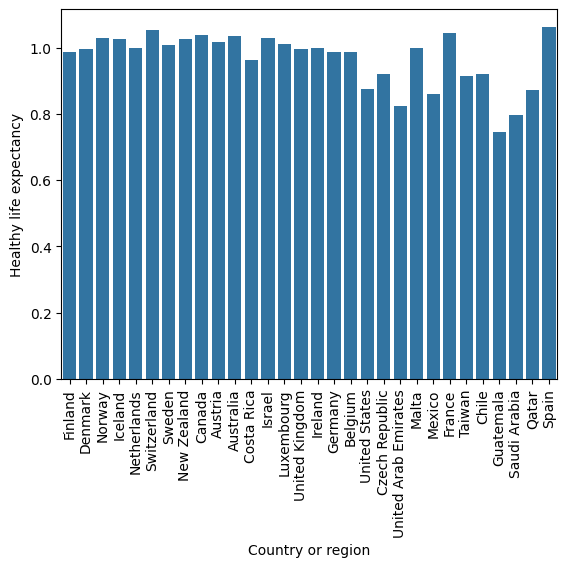

In [84]:
sns.barplot(x=shorted_data['Country or region'], y=shorted_data['Healthy life expectancy'])
plt.xticks(rotation=90)
None

Теперь построим гистограммы распределения величин из шкалы отношений

<Axes: xlabel='Score', ylabel='Count'>

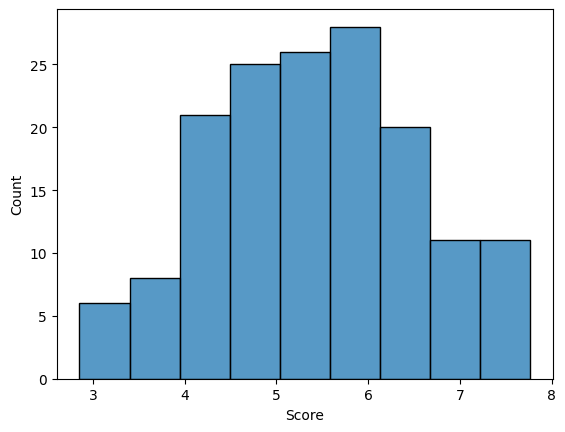

In [14]:
sns.histplot(hapiness_data['Score'])

<Axes: xlabel='Generosity', ylabel='Count'>

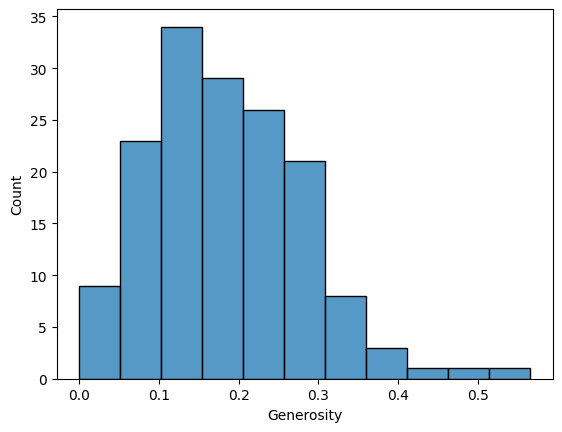

In [86]:
sns.histplot(hapiness_data['Generosity'])

<Axes: xlabel='Healthy life expectancy', ylabel='Count'>

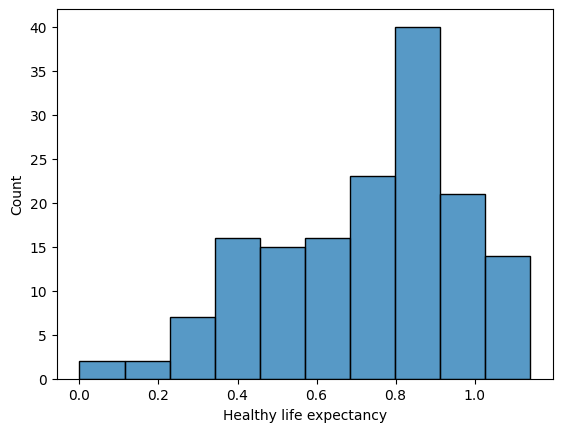

In [87]:
sns.histplot(hapiness_data['Healthy life expectancy'])

## Задание 5: Проверка гипотез
Сгенерируйте два шкалированных ряда данных и проверьте статистически значимые различия между ними с использованием t-теста. Визуализируйте эти данные и результаты своего анализа.


In [15]:
from scipy import stats

In [16]:
students_data = pd.read_csv('data/StudentsPerformance.csv')

In [17]:
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Рассмотрим две группы из выборки: группы парней и девушек.

In [18]:
males = students_data[['math score', 'reading score', 'writing score']][students_data.gender=='male']
males.head()

,math score,reading score,writing score
3,47,57,44
4,76,78,75
7,40,43,39
8,64,64,67
10,58,54,52


In [19]:
females = students_data[['math score', 'reading score', 'writing score']][students_data.gender=='female']
females.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
5,71,83,78
6,88,95,92


Рассмотрим величину math_score

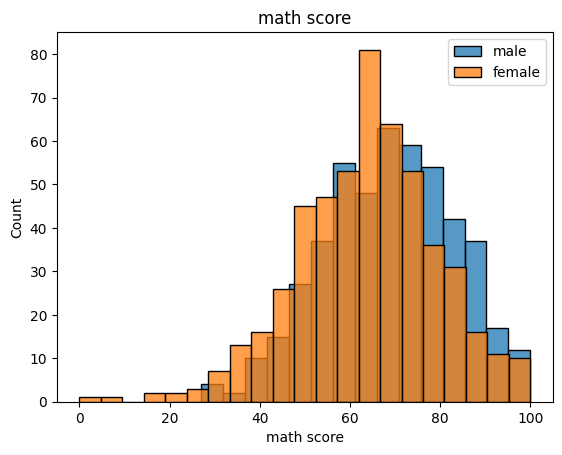

In [20]:
sns.histplot(males['math score'])
sns.histplot(females['math score'])
plt.legend(['male', 'female'])
plt.title('math score')
plt.show()

Из гистограмм можно предполагать, что средние двух групп совпадут. Выдвинем гипотезу с альтернативой
$$H_0 : \{\mu_1 = \mu_2\},$$
$$H_1 : \{\mu_1 \ne \mu_2\},$$
где $\mu_1$ -- среднее группы парней, а $\mu_2$ -- среднее группы девушек.

Проверим эту гипотезу с помощью t-критерия Стъюдента. Возьмем пороговое значение $\varepsilon = 0.05$. То есть, если Р-значение критерия выше порогового значения, то мы принимаем гипотезу $H_0$, иначе отклоняем ее.

In [21]:
t_statistic, p_value = stats.ttest_ind(males['math score'], females['math score'])
print('t-statistic:', t_statistic)
print('p value:', p_value)

t-statistic: 5.383245869828983
p value: 9.120185549328822e-08


Итак, мы отклоняем гипотезу о совпадении средних двух выборок.

Рассмотрим по аналогии reading_score и writing_score

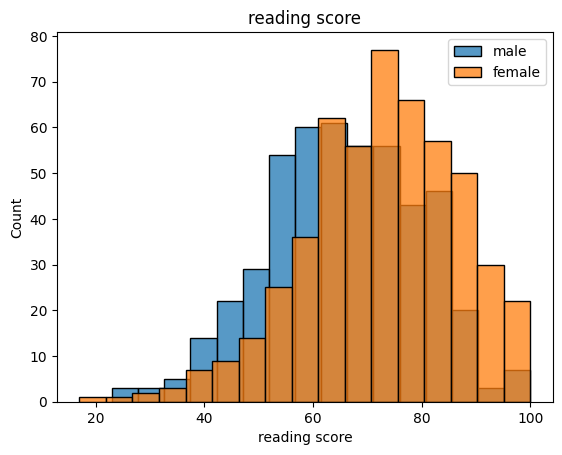

In [22]:
sns.histplot(males['reading score'])
sns.histplot(females['reading score'])
plt.legend(['male', 'female'])
plt.title('reading score')
plt.show()

In [25]:
t_statistic, p_value = stats.ttest_ind(males['reading score'], females['reading score'])
print('t-statistic:', t_statistic)
print('p value:', p_value)

t-statistic: -7.959308005187657
p value: 4.680538743933289e-15


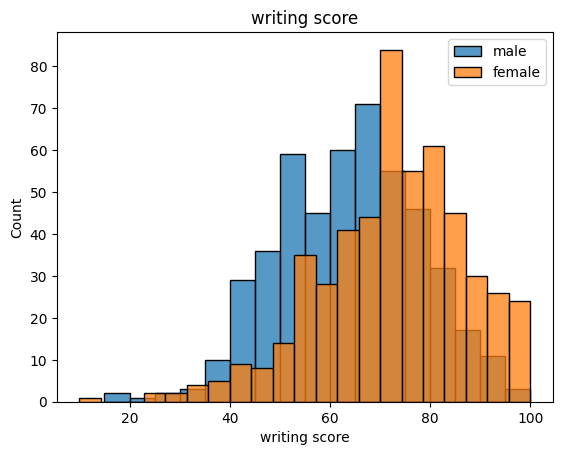

In [26]:
sns.histplot(males['writing score'])
sns.histplot(females['writing score'])
plt.legend(['male', 'female'])
plt.title('writing score')
plt.show()

In [27]:
t_statistic, p_value = stats.ttest_ind(males['writing score'], females['writing score'])
print('t-statistic:', t_statistic)
print('p value:', p_value)

t-statistic: -9.979557910004507
p value: 2.019877706867934e-22
